# Simple Example of PCA
A very simple test case for principal component analysis.

In [18]:
import sys
sys.path.append('../')
from LinearMethods import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating a sample 2D data set
N = 500 # The number of samples to use
data = np.zeros((N,2))
# x data is drawn from a normal distribution
data[:,0] = np.random.normal(size=N)
# y data is a function of x data, with some variation
data[:,1] = 1*data[:,0] + np.random.normal(size=N)

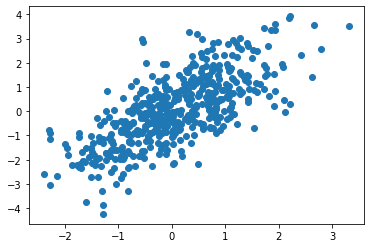

In [3]:
# Plotting the sample data
plt.scatter(data[:,0],data[:,1])

In [5]:
# Performing pca with the PCA object from LinearMethods
pca = PCA(data)

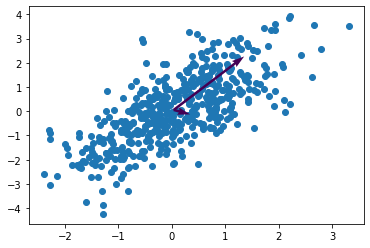

In [7]:
# Drawing the principal components at the mean on top of the data
plt.scatter(data[:,0],data[:,1])
plt.quiver(np.ones((2,1))*pca.xbar[0], # x-component of the mean
           np.ones((2,1))*pca.xbar[1], # y-component of the mean
           pca.V[0,:]*(pca.s), # x and y components of the pca vectors
           pca.V[1,:]*(pca.s), # scaled to the variance
           np.ones((2,1)), angles='xy', scale_units='xy', scale=1)

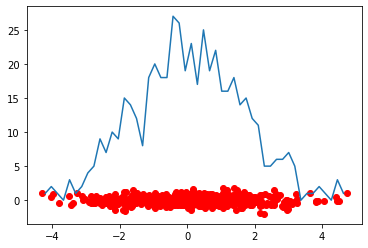

In [8]:
# pca.T contains the data set rotated onto the PC.
# Below is a scatter plot of the data in that frame, along with a histogram of the 
# distribution on the fisrt principal component.
plt.scatter(pca.T[:,0],pca.T[:,1], color='r')
h, a = pca.distribution(component=0)
plt.plot(a,h)

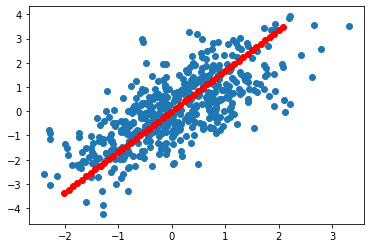

In [23]:
# To demonstrate the sampling feature, say we want to see what the values of -4 through 4
# of the first principal component look like (while the 2nd principal component is 0 - i.e. the mean).
plt.scatter(data[:,0],data[:,1])
axis = np.linspace(-4,4)
y = np.zeros((len(axis),2))
for a in range(len(axis)):
    y[a,:] = pca.sample(float(axis[a]))
plt.scatter(y[:,0],y[:,1], color='r')

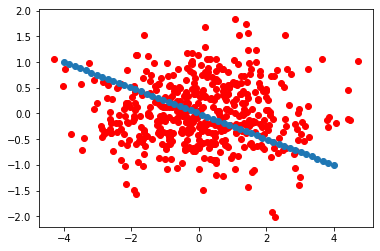

In [34]:
# Using this, we can take any line in the PC space, and graph it in real space:
# Say the line in PC space:
plt.scatter(pca.T[:,0],pca.T[:,1], color='r')
x = np.linspace(-4,4); y = -0.25*x
line = np.array([x,y]).transpose()
plt.scatter(line[:,0],line[:,1])

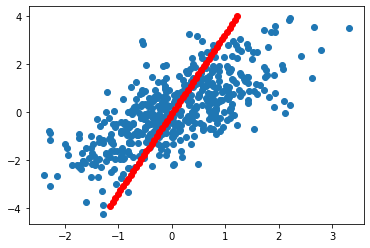

In [35]:
# ...So in real space, that corrosponds to:
realline = np.zeros(line.shape)
for a in range(realline.shape[0]):
    realline[a,:] = pca.sample([line[a,0],line[a,1]])
plt.scatter(data[:,0],data[:,1])
plt.scatter(realline[:,0],realline[:,1], color='r')